### Handwritten Digit Recognition

In [2]:
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
import cv2  # Computer vision library
from PIL import Image  # Image processing
import tensorflow as tf  # Deep learning framework
tf.random.set_seed(3)  # Set random seed for reproducibility
from tensorflow import keras  # High-level neural networks API
from keras.datasets import mnist  # MNIST dataset for digits
from tensorflow.math import confusion_matrix  # Performance evaluation


In [3]:
# loading the data set
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [4]:
print("X_trian shape: ", X_train.shape)
print("Y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape", Y_test.shape)


X_trian shape:  (60000, 28, 28)
Y_train shape (60000,)
X_test shape (10000, 28, 28)
Y_test shape (10000,)


X_tain -> 60000 images , each image is 28x28 , gray scale image /
y_tain -> 60000 labels (one , two .... )

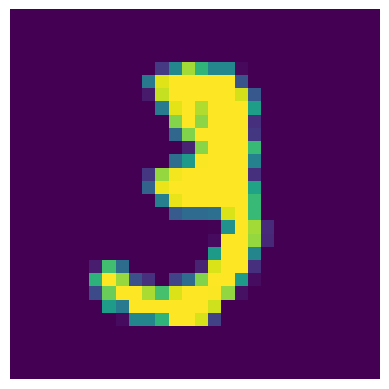

label : 3


In [44]:
# display an image

img = X_train[10]
plt.imshow(img )
plt.axis('off')
plt.show()

print("label :" , Y_train[10])


In [6]:
#unique value in labels

print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [7]:
# scale the data

X_train = X_train / 255
X_test = X_test / 255


### Building the neural network

In [8]:
# setting up the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28 , 28)), #feeding the data as one single dimention array
    keras.layers.Dense(50 , activation='relu'), #hidden layer 1
    keras.layers.Dense(50 , activation='relu'), #hidden layer 2
    keras.layers.Dense(10 , activation='sigmoid') #output layer

])

c:\Python312\cv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compile the model with optimizer, loss function, and metrics
model.compile(optimizer='adam',  # Optimizer for training
              loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Metric to evaluate model performance

In [10]:
#training the model

model.fit(X_test , Y_test , epochs = 10) # epochs is the number of times the model will see the data

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - accuracy: 0.6743 - loss: 1.1067
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.9202 - loss: 0.2592
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.9420 - loss: 0.1891
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.9553 - loss: 0.1469
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.9624 - loss: 0.1179
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.9714 - loss: 0.0955
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.9772 - loss: 0.0773
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.9829 - loss: 0.0632
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.9858 - loss: 0.0499
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.9924 - loss: 0.0386


In [11]:
# accuracy on test data
loss , accuracy = model.evaluate(X_test, Y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.9926 - loss: 0.0329
Test loss: 0.02907717600464821
Test accuracy: 0.9933000206947327


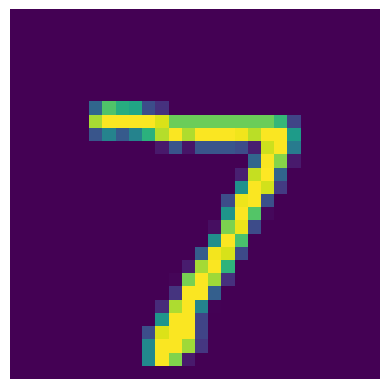

label : 7


In [12]:
# display the 1 st image of test data
img = X_test[0]
plt.imshow(img)
plt.axis("off")
plt.show()

print("label :" , Y_test[0])


In [13]:
Y_pred = model.predict(X_test)
print(Y_pred.shape)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step
(10000, 10)


(10000,10) means 10000 data points and each data point has 10 features.this features are the probability of the 10 classes.

In [14]:
print(Y_pred[0])

[2.1601859e-02 1.9681661e-03 9.6530128e-01 9.8201180e-01 3.7277982e-07
 7.0404261e-01 2.2585867e-07 9.9999607e-01 1.2585843e-01 8.2348250e-03]


In [15]:
# converting the prediction probability to class label

Y_pred_labels = [np.argmax(i) for i in Y_pred]  


In [16]:
# Calculate confusion matrix (use a different variable name)
cm = confusion_matrix(Y_test, Y_pred_labels)  # Use a different variable name
print(cm)


tf.Tensor(
[[ 979    0    0    0    0    0    0    0    1    0]
 [   0 1133    1    0    0    0    0    1    0    0]
 [   0    0 1027    1    0    1    1    1    1    0]
 [   0    0    3  983    0   13    0    0    7    4]
 [   0    0    0    0  982    0    0    0    0    0]
 [   1    0    0    1    0  890    0    0    0    0]
 [   0    1    0    0    0    6  951    0    0    0]
 [   0    0    0    0    0    0    0 1026    0    2]
 [   0    2    0    3    1    4    0    0  963    1]
 [   2    0    0    0    5    2    0    1    0  999]], shape=(10, 10), dtype=int32)


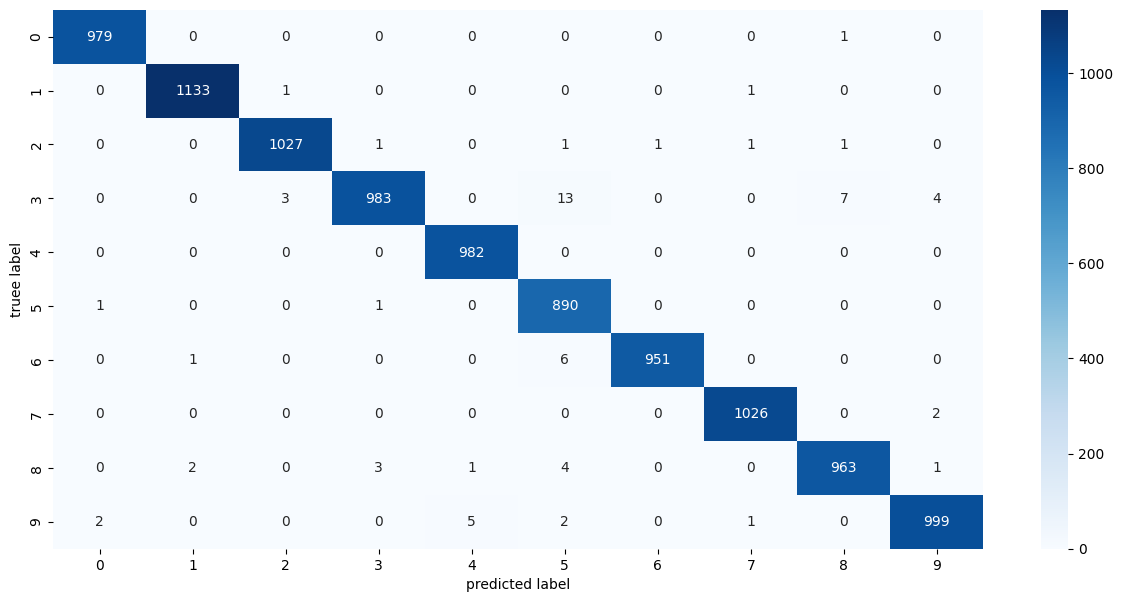

In [17]:
plt.figure(figsize=(15,7))
sns.heatmap(cm , annot = True , cmap = 'Blues' , fmt = 'g')
plt.ylabel('truee label')
plt.xlabel('predicted label')
plt.show()

### building a prediiction system for handwritten digits

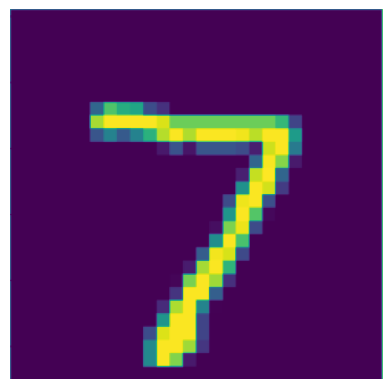

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
predicted label is  7


In [48]:
# predict a number

input_path = input ("enter the path of the image : " )
input_img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
assert input_img is not None, "file could not be read, check with os.path.exists()"
plt.imshow(input_img)
plt.axis('off')
plt.show()

# input image should resize to the 28*28
img_resize = cv2.resize(input_img, (28, 28))
# input resize image should normalize
img_resize = img_resize/255
# image reshape
img_reshape = np.reshape(img_resize , [1, 28 , 28])
input_prediction = model.predict(img_reshape)
print("predicted label is " , np.argmax(input_prediction))





